# Wald Test

In [17]:
import tprstats
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
coffee_data = pd.read_excel('../data/Coffee_Data.xlsx', engine='openpyxl')
diamonds_211 = pd.read_excel('../data/Diamonds_211.xlsx', engine='openpyxl')
solar_data = pd.read_excel('../data/Solar_Data.xlsx', engine='openpyxl')
solar_new_prospects = pd.read_excel('../data/Solar_New_Prospects.xlsx', engine='openpyxl')

## Testing the Wald Test
### Cross-section LM

In [18]:
diamonds_211

,Price,Carat,Clarity,Color,Cut,Salesperson
0,11102,1.70,2,11,2,4
1,10228,1.70,2,11,2,3
2,11389,1.86,2,11,2,3
3,13504,2.03,2,11,2,3
4,13657,2.08,2,11,2,3
...,...,...,...,...,...,...
206,2843,0.56,8,11,2,6
207,4720,0.71,8,11,2,6
208,11340,1.05,8,11,2,3
209,9621,1.07,8,11,2,2


In [35]:
model_diamonds = tprstats.model("cs", 'Price ~ Carat + C(Clarity)', diamonds_211)
print(model_diamonds._model.exog_names)
model_diamonds.wald_test('C(Clarity)[T.5] = C(Clarity)[T.6]')

['Intercept', 'C(Clarity)[T.3]', 'C(Clarity)[T.4]', 'C(Clarity)[T.5]', 'C(Clarity)[T.6]', 'C(Clarity)[T.8]', 'Carat']
Wald Test Statistic:  1.3686960207841596
p-value:  0.2434010493556541


In [2]:
model_coffee_ts = tprstats.model(name = "ts", formula='cons~rpcarb+rpcinc+rpcofe', data=coffee_data)
model_coffee_ts.summary()

<bound method _StatsmodelsModelWrapper.summary of <tprstats.models.TimeSeriesLinearModel object at 0x0000021241CCDBE0>>

The p-value for the wald test `hypothesis ='rpcofe=-0.013","rpcarb=0.08"` 
- using a model fitted with `cov_type='HAC'` should be p=0.3896
- Using a model fitted with `cov_type='H'` should be p=0.1826.

In [3]:
model_coffee_ts.wald_test('rpcofe=-0.013, rpcarb=0.08')

Wald Test Statistic:  1.1509055124120415
p-value:  0.32359114251321136


In [4]:
# trying use_correction=True
model_wald = smf.ols(formula='cons ~ rpcarb + rpcinc + rpcofe', data=coffee_data).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
model_wald.wald_test('rpcofe=-0.013, rpcarb=0.08', use_f=True, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.1509055124120415, p=0.32359114251321136, df_denom=57, df_num=2>

In [5]:
model_wald.wald_test_terms(scalar=True)

<class 'statsmodels.stats.contrast.WaldTestResults'>
                 chi2        P>chi2  df constraint
Intercept    0.001150  9.729493e-01              1
rpcarb     167.442828  2.677334e-38              1
rpcinc      17.230706  3.310424e-05              1
rpcofe       6.614386  1.011582e-02              1

## Scipy

In [6]:
X = coffee_data[['rpcarb', 'rpcinc', 'rpcofe']]
X = sm.add_constant(X)
y = coffee_data['cons']
model_scipy = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})

In [7]:
null_values = np.array([-0.013, 0.08])
wald_statistic= np.sum((model_scipy.params[1:3] - null_values)**2) / np.diag(model_scipy.cov_params()[1:3])
p_value = stats.chi2.sf(wald_statistic, df=2)
print("Wald Test Statistic", wald_statistic)
print("p-value", p_value)

Wald Test Statistic [-1.12328708 63.59479699]
p-value [1.00000000e+00 1.55083393e-14]


## Binary Choice Wald Tests 


In [19]:
solar_logit=tprstats.model("logit",formula="Sale ~ AnnualSave + AnnualCost + DrivesHybrid + NearbySolar + HomeValue",data=solar_data)
print(solar_logit.summary())

Optimization terminated successfully.
         Current function value: 0.102926
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   Sale   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2847
Time:                        15:21:27   Log-Likelihood:                -154.39
converged:                       True   LL-Null:                       -215.84
Covariance Type:            nonrobust   LLR p-value:                 7.619e-25
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.7445      4.837     -2.635      0.008     -22.224      -3.265
AnnualSave       3.9268

In [10]:
solar_logit.wald_test('AnnualSave=4 , AnnualCost=-3')

Wald Test Statistic:  0.6714099320890368
p-value:  0.7148339750029004


In [21]:
solar_probit=tprstats.model("probit",formula="Sale ~ AnnualSave + AnnualCost + DrivesHybrid + NearbySolar + HomeValue",data=solar_data)
print(solar_probit.summary())

Optimization terminated successfully.
         Current function value: 0.100579
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                   Sale   No. Observations:                 1500
Model:                         Probit   Df Residuals:                     1494
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.3010
Time:                        15:22:30   Log-Likelihood:                -150.87
converged:                       True   LL-Null:                       -215.84
Covariance Type:            nonrobust   LLR p-value:                 2.450e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.5365      2.307     -2.833      0.005     -11.058      -2.015
AnnualSave       1.9807

In [16]:
solar_probit.wald_test('AnnualSave=2.3 , AnnualCost=-1.9')

Wald Test Statistic:  1.5116826434827433
p-value:  0.4696153508770411


In [28]:
prospects_predict=solar_logit.predict(solar_new_prospects)
prospects_predict.head

<bound method NDFrame.head of 0      0.200212
1      0.030138
2      0.006383
3      0.015173
4      0.003679
         ...   
995    0.001549
996    0.284837
997    0.800973
998    0.692739
999    0.000486
Length: 1000, dtype: float64>

In [27]:
solar_new_prospects.head

<bound method NDFrame.head of      Customer  AnnualSave  ElecBill  AnnualCost  DrivesHybrid  NearbySolar  \
0           1    1.887929  1.823863    1.735912             0            1   
1           2    1.742936  1.839178    1.706554             0            0   
2           3    1.559239  1.208948    1.900877             0            0   
3           4    1.673532  1.386376    1.824364             0            0   
4           5    1.304396  1.661826    1.799923             0            0   
..        ...         ...       ...         ...           ...          ...   
995       996    1.255306  1.459505    1.969996             0            0   
996       997    2.523308  2.628325    1.828736             0            0   
997       998    3.137109  2.328434    1.845495             0            0   
998       999    2.809793  2.741628    2.076419             1            0   
999      1000    0.708387  0.735625    1.641288             0            0   

      HomeValue  
0    511.553652

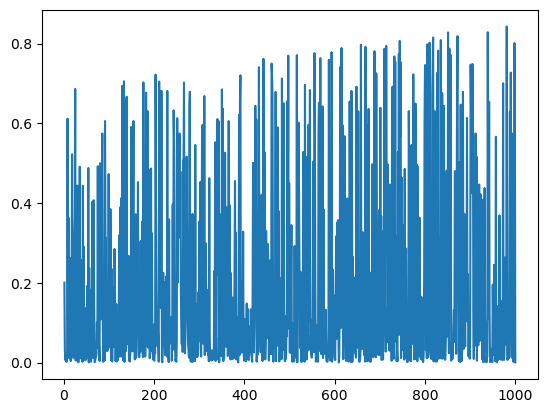

In [38]:
xvar=list(range(1,1001))
xvar=np.transpose(xvar)
plt.plot(xvar,prospects_predict)